In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

def koch_snowflake(order, scale=10):
    def _koch_snowflake_complex(order):
        if order == 0:
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3
            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors
            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

def plot_koch_snowflake(order, output_dir="output"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    x, y = koch_snowflake(order)
    plt.figure(figsize=(16, 16), dpi=300)  # 画質を上げるためにdpiを300に設定
    plt.plot(x, y, 'b')
    plt.axis('equal')
    plt.axis('off')  # 軸を非表示にする
    plt.title(f"Koch Snowflake of order {order}", fontsize=20)
    output_path = os.path.join(output_dir, f"koch_snowflake_order_{order}.png")
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()
    print(f"Saved Koch Snowflake of order {order} to {output_path}")

# Koch Snowflakeのオーダーを設定（例：8）
plot_koch_snowflake(order=8)


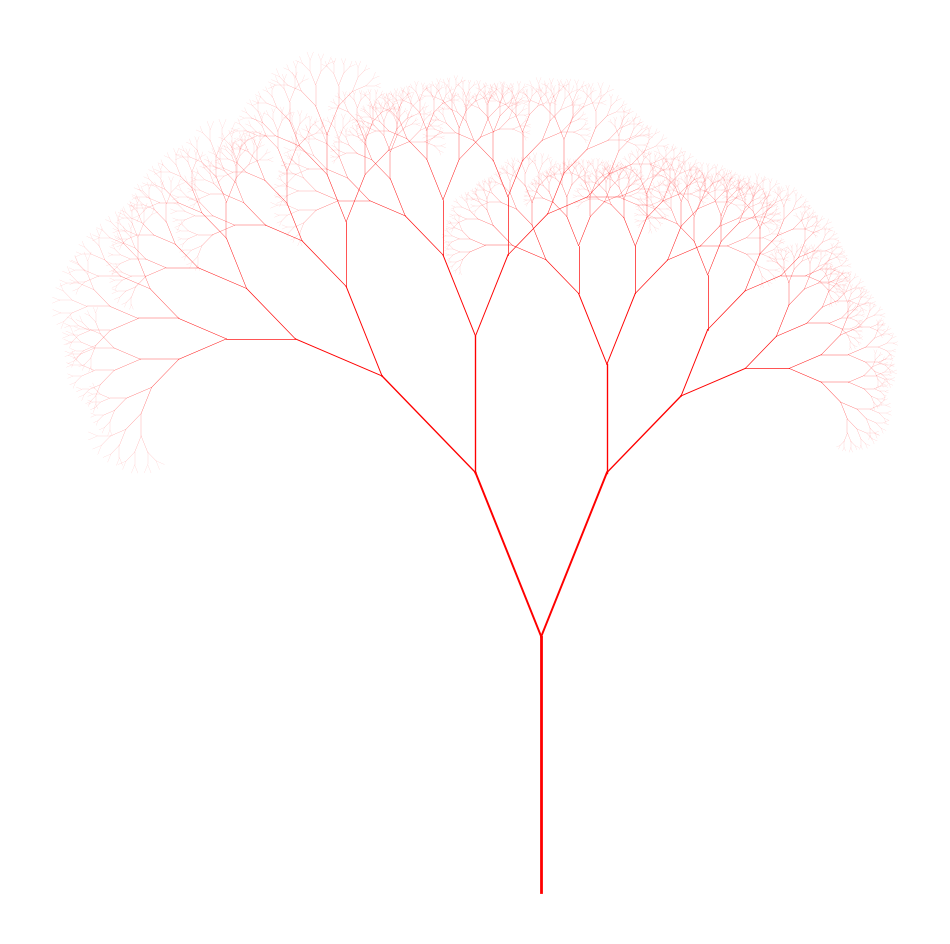

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import random

def draw_branch(x, y, angle, length, width, order):
    if order == 0:
        return
    
    # Calculate the end point of the branch
    x_end = x + length * np.cos(angle)
    y_end = y + length * np.sin(angle)
    
    # Draw the branch
    plt.plot([x, x_end], [y, y_end], color='red', linewidth=width)
    
    # Recursively draw the next branches
    new_length = length * random.uniform(0.6, 0.8)
    new_width = width * 0.7
    angle_variation = np.pi / 8

    draw_branch(x_end, y_end, angle - angle_variation, new_length, new_width, order - 1)
    draw_branch(x_end, y_end, angle + angle_variation, new_length, new_width, order - 1)

def plot_fractal_tree(order, length=10, angle=np.pi/2, width=2, figsize=(12, 12)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    draw_branch(0, 0, angle, length, width, order)
    plt.show()

# Fractal treeのオーダーを設定（例：5）
plot_fractal_tree(order=12)


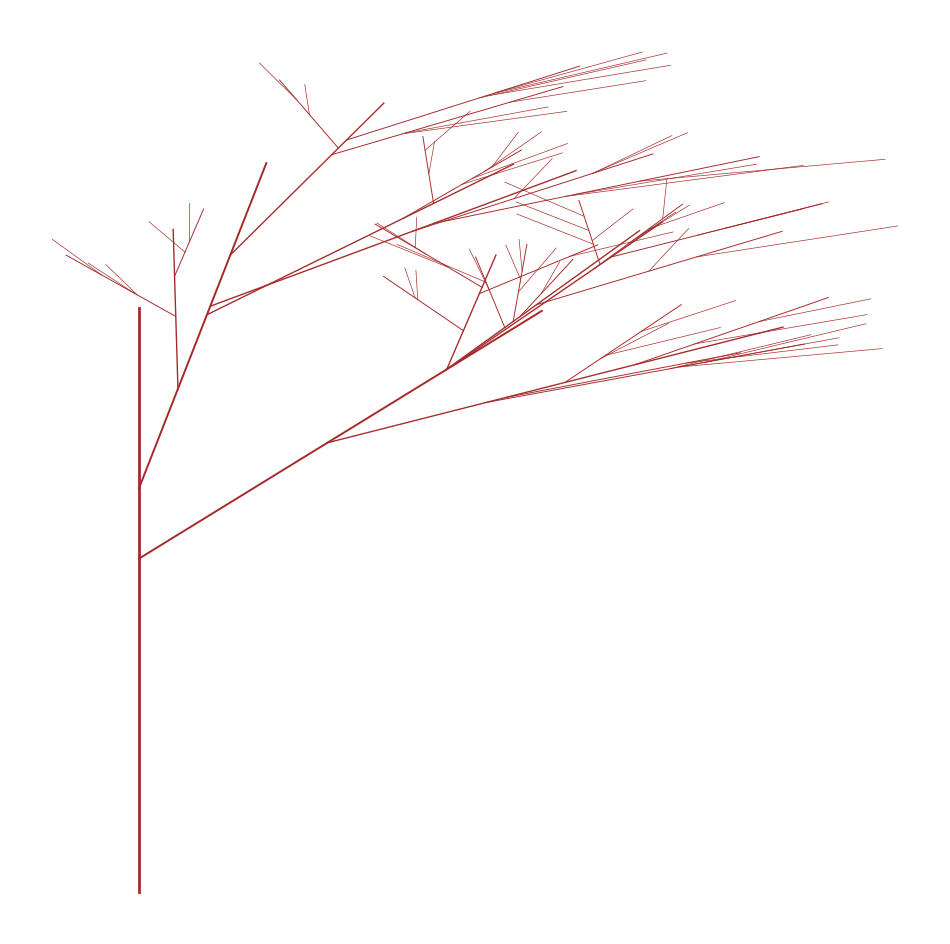

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import random

def draw_branch(x, y, angle, length, width, order):
    if order == 0 or length < 0.5:
        return
    
    # Calculate the end point of the branch
    x_end = x + length * np.cos(angle)
    y_end = y + length * np.sin(angle)
    
    # Draw the main branch
    plt.plot([x, x_end], [y, y_end], color='brown', linewidth=width)
    
    # Recursively draw the next branches with random branch points
    num_branches = random.randint(2, 4)  # Randomly decide the number of branches (2 to 4)
    for _ in range(num_branches):
        branch_ratio = random.uniform(0.3, 0.8)  # Random position on the branch to start the new branch
        x_branch = x + branch_ratio * length * np.cos(angle)
        y_branch = y + branch_ratio * length * np.sin(angle)
        new_length = length * random.uniform(0.4, 0.6)  # Shorter branches
        new_width = width * 0.7
        angle_variation = np.pi / 8
        new_angle = angle + random.uniform(-angle_variation, angle_variation)
        
        draw_branch(x_branch, y_branch, new_angle, new_length, new_width, order - 1)

def plot_fractal_tree(order, length=10, angle=np.pi/2, width=2, figsize=(12, 12)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    draw_branch(0, 0, angle, length, width, order)
    plt.show()

# Fractal treeのオーダーを設定（例：5）
plot_fractal_tree(order=8)
